In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

## See if Audio Analysis can match textual syllable count


In [3]:
transcript_file = 'data/korean-single-speaker/transcript.v.1.4.txt'
tr_df = pd.read_csv(transcript_file, sep="|", names=["audio_file", "tr_w_num", "tr_syl", "tr_char", "dur", "en"])


In [4]:
# Since we are not interested in numerics as numbers, we drop that column
tr_df = tr_df.drop(columns=['tr_w_num'])
tr_df


,audio_file,tr_syl,tr_char,dur,en
0,1/1_0000.wav,그는 괜찮은 척하려고 애쓰는 것 같았다.,그는 괜찮은 척하려고 애쓰는 것 같았다.,3.5,He seemed to be pretending to be okay.
1,1/1_0001.wav,그녀의 사랑을 얻기 위해 애썼지만 헛수고였다.,그녀의 사랑을 얻기 위해 애썼지만 헛수고ᄋ...,4.0,I tried in vain to win her love.
2,1/1_0002.wav,용돈을 아껴 써라.,용돈을 아껴 써라.,1.8,Save your pocket money.
3,1/1_0003.wav,그는 아내를 많이 아낀다.,그는 아내를 많이 아낀다.,2.3,He cherishes his wife.
4,1/1_0004.wav,그 애 전화번호 알아?,그 애 전화번호 알아?,1.3,Do you know his number?
...,...,...,...,...,...
12849,4/4_5627.wav,깨진 유리 조각에 손가락을 벴어요.,깨진 유리 조각에 손가락을 벴어요.,3.9,I cut my finger on a piece of broken glass.
12850,4/4_5628.wav,아드님이 친구들과 야구를 하다 유리창을 깼어요.,아드님이 친구들과 야구를 하다 유리창을 ᄁ...,5.4,Your son was playing baseball with his friends...
12851,4/4_5629.wav,일찍 신청하는 사람이 유리할 거야.,일찍 신청하는 사람이 유리할 거야.,3.7,Early applicants will be given advantages.
12852,4/4_5630.wav,이 두 소설은 줄거리가 유사해요.,이 두 소설은 줄거리가 유사해요.,3.5,These two novels are much alike in their synop...


In [5]:
# Remove spaces and other non-characters and count the number of syllables (in Korean this is easy)
tr_df['syl_count'] = tr_df['tr_syl'].str.replace('[\s.!?]', '', regex=True).str.len()
tr_df

,audio_file,tr_syl,tr_char,dur,en,syl_count
0,1/1_0000.wav,그는 괜찮은 척하려고 애쓰는 것 같았다.,그는 괜찮은 척하려고 애쓰는 것 같았다.,3.5,He seemed to be pretending to be okay.,16
1,1/1_0001.wav,그녀의 사랑을 얻기 위해 애썼지만 헛수고였다.,그녀의 사랑을 얻기 위해 애썼지만 헛수고ᄋ...,4.0,I tried in vain to win her love.,19
2,1/1_0002.wav,용돈을 아껴 써라.,용돈을 아껴 써라.,1.8,Save your pocket money.,7
3,1/1_0003.wav,그는 아내를 많이 아낀다.,그는 아내를 많이 아낀다.,2.3,He cherishes his wife.,10
4,1/1_0004.wav,그 애 전화번호 알아?,그 애 전화번호 알아?,1.3,Do you know his number?,8
...,...,...,...,...,...,...
12849,4/4_5627.wav,깨진 유리 조각에 손가락을 벴어요.,깨진 유리 조각에 손가락을 벴어요.,3.9,I cut my finger on a piece of broken glass.,14
12850,4/4_5628.wav,아드님이 친구들과 야구를 하다 유리창을 깼어요.,아드님이 친구들과 야구를 하다 유리창을 ᄁ...,5.4,Your son was playing baseball with his friends...,20
12851,4/4_5629.wav,일찍 신청하는 사람이 유리할 거야.,일찍 신청하는 사람이 유리할 거야.,3.7,Early applicants will be given advantages.,14
12852,4/4_5630.wav,이 두 소설은 줄거리가 유사해요.,이 두 소설은 줄거리가 유사해요.,3.5,These two novels are much alike in their synop...,13


Consonant Phonemes duration 25-50 msec
Vowel Phonemes duration 50-100+ msec


## Audio Analysis

In [6]:
# /kaggle/input/korean-single-speaker-speech-dataset/transcript.v.1.4.txt
# /kaggle/input/korean-single-speaker-speech-dataset/kss/1/1_0845.wav (example)

# from comet_ml import Experiment
import librosa
import librosa.display
from scipy.io import wavfile as wav
import IPython

In [7]:
data_dir = './data/korean-single-speaker/kss'

In [30]:
# count the number of envelope onsets for a given audio file
def num_onset(audio_filename, **kwargs):
    audio_, sr_ = librosa.load(audio_filename)
    onset_detects = librosa.onset.onset_detect(y=audio_, sr=sr_, units='time', **kwargs)
    return onset_detects.shape[0]


## Using Onset Detection to predict syllable start

Result: Meh.

In [9]:
audio_df_fname = "./audio_df.pickle"

In [10]:
from scipy.stats import gaussian_kde


# # sample_idxs = [0,4]
# num_samples = 50
# samples = np.arange(len(tr_df['audio_file'])) # basically an array of indices
# sample_idxs = np.random.choice(samples, size=num_samples, replace=False)

audio_df = pd.DataFrame()
audio_df['audio_file'] = data_dir + '/'+ tr_df['audio_file']
audio_df['syl_count'] = tr_df['syl_count']
audio_df['num_onset'] = audio_df['audio_file'].apply(num_onset)
audio_df['syl_delta'] = audio_df['num_onset'] - audio_df['syl_count']

audio_df.to_pickle(audio_df_fname)

In [11]:
audio_df = pd.read_pickle(audio_df_fname)
print(audio_df.shape)

(12854, 4)


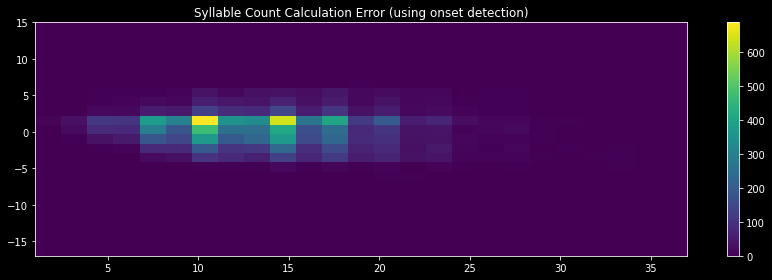

In [12]:
plt.style.use('dark_background')
plot_df = audio_df[['syl_count', 'syl_delta']]

x = plot_df['syl_count']
y = plot_df['syl_delta']

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,4), tight_layout=True)
h2d = ax1.hist2d(x, y, 25)
fig.colorbar(h2d[3])
ax1.set_title('Syllable Count Calculation Error (using onset detection)')
plt.show()

### Analyze Highly Erroneous Syllable Counts


10554    28
Name: syl_count, dtype: int64
new syl_delta: 10554    11
Name: audio_file, dtype: int64
text:                                           audio_file  syl_count  num_onset  \
10554  ./data/korean-single-speaker/kss/4/4_3332.wav         28         11   

       syl_delta                               tr_syl  
10554        -17  돼지고기 일 킬로그램에 얼마예요?돼지고기 일킬로그램에 얼마예요?  


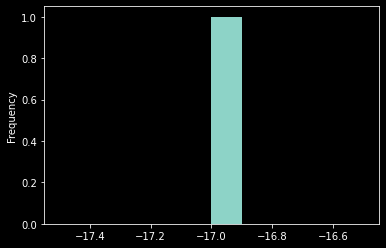

In [65]:
audio_df['tr_syl'] = tr_df['tr_syl']
audio_df_errs = audio_df[abs(audio_df['syl_delta'])>15]
audio_df_errs['syl_delta'].plot.hist()
tmp = audio_df_errs['audio_file'].apply(num_onset)
print(audio_df_errs['syl_count'])
print(f'new syl_delta: {tmp}')
print(f'text: {audio_df_errs}')





In [76]:
samples_with_high_delta = audio_df_errs['audio_file']
sr_ = None
audio_ = None
for fn in samples_with_high_delta:
    print(f'Data file to analyze: {fn}')
    print(f'current sample rate: {sr_}')
    new_audio_, new_sr_ = librosa.load(fn)
    print(f"latest sample rate: {new_sr_}")
    print(f'new_audio_ shape: {new_audio_.shape}')
    if sr_ is None:
        sr_ = new_sr_
    else:
        assert(new_sr_ == sr_)

    if audio_ is None:
        audio_ = new_audio_
    else:
        audio_ = np.concatenate((audio_, new_audio_))
    print('new audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(new_audio_), np.max(new_audio_)))
    print('full audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(audio_), np.max(audio_)))

print(f'final audio shape: {audio_.shape}')
tr_syl_ = audio_df_errs['tr_syl']
print(f'text:')
print(f'{tr_syl_}')

IPython.display.Audio(audio_, rate=sr_)

Data file to analyze: ./data/korean-single-speaker/kss/4/4_3332.wav
current sample rate: None
latest sample rate: 22050
new_audio_ shape: (81920,)
new audio file min~max range: -0.47 to -0.47
full audio file min~max range: -0.47 to -0.47
final audio shape: (81920,)
text:
10554    돼지고기 일 킬로그램에 얼마예요?돼지고기 일킬로그램에 얼마예요?
Name: tr_syl, dtype: object


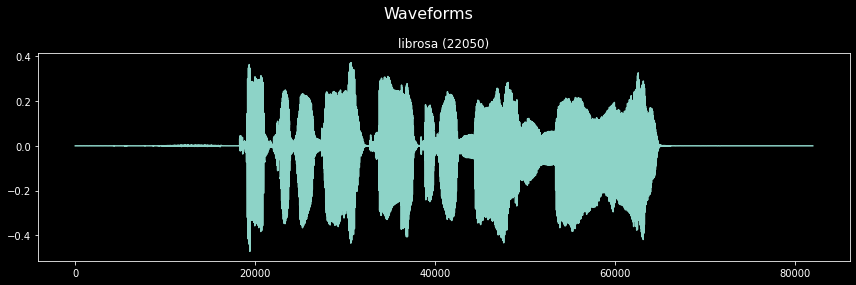

In [69]:
# fig, ax = plt.subplots()
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8, 4))
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,4), tight_layout=True)
fig.suptitle('Waveforms', fontsize=16)
ax1.set_title(f'librosa ({sr_})')
ax1.plot(audio_)

### MFCCs

In [70]:
# n_fft = int(sr_ * 0.046)   # window length: 0.02 s
# print(n_fft)
# hop_length = n_fft // 2  # usually one specifies the hop length as a fraction of the window length
# print(hop_length)
# mfccs = librosa.feature.mfcc(audio_, sr=sr_, n_mfcc=40, hop_length=hop_length, n_fft=n_fft)
hop_length = 512
n_mfcc = 20

# n_mfcc might be useful as a hyper parameter
mfccs = librosa.feature.mfcc(y=audio_, sr=sr_, n_mfcc=n_mfcc, hop_length=hop_length)
print(mfccs.shape)

# num of mfcc frames(?) =~ num_samples/hop_length
print(audio_.shape)

(20, 161)
(81920,)


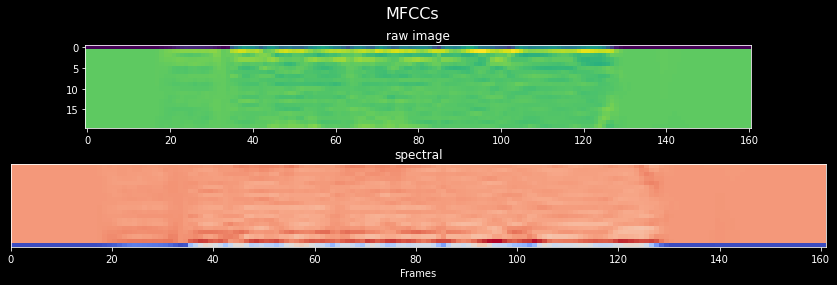

In [71]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,4), tight_layout=True)
fig.suptitle('MFCCs', fontsize=16)
ax1.set_title(f'raw image')
ax2.set_title(f'spectral')
ax1.imshow(mfccs)
librosa.display.specshow(mfccs, sr=sr_, x_axis='frames', ax=ax2)

### Onset Detection

What happens if we use onset detection to align the syllables?

In [72]:
# TODO: Understand hop_length in this context (we are using default so it aligns, but that's brittle)
# o_env = librosa.onset.onset_strength(y=librosa_audio, sr=librosa_sample_rate)
# times = librosa.times_like(o_env, sr=sr)
# onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
onset_detects = librosa.onset.onset_detect(y=audio_, sr=sr_, units='time')
print(onset_detects.shape)
print(onset_detects)

(11,)
[0.85913832 1.04489796 1.27709751 1.34675737 1.53251701 1.67183673
 1.81115646 2.04335601 2.15945578 2.43809524 2.80961451]


/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


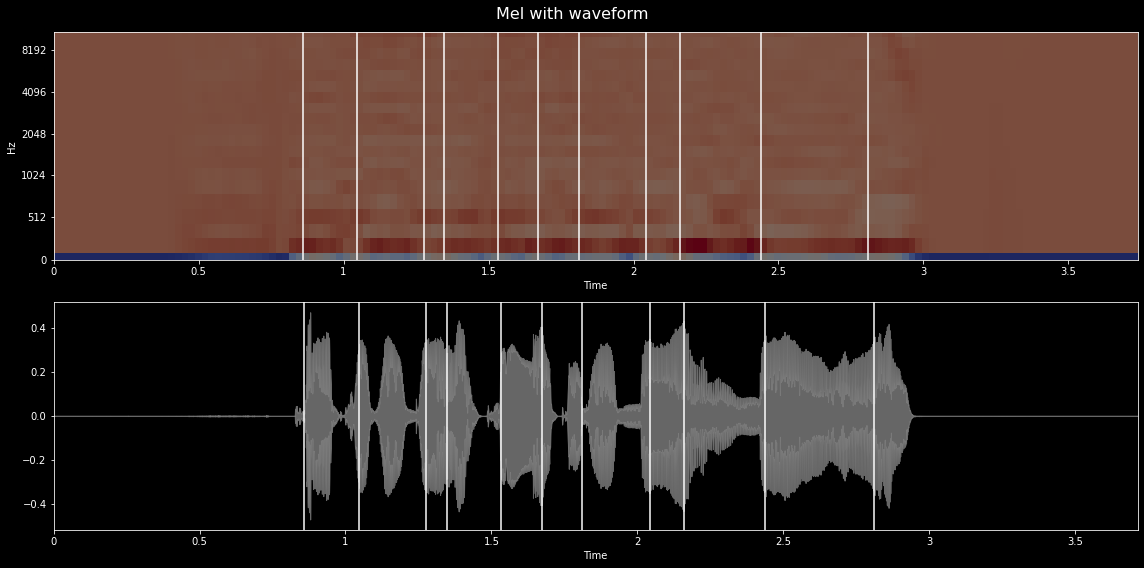

text: 10554    돼지고기 일 킬로그램에 얼마예요?돼지고기 일킬로그램에 얼마예요?
Name: tr_syl, dtype: object


In [77]:
mfcc_cutoff = 20
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,8), tight_layout=True)
fig.suptitle('Mel with waveform', fontsize=16)
# ax2 = ax1.twinx()
librosa.display.specshow(mfccs[0:mfcc_cutoff], sr=sr_, x_axis='time', y_axis='mel', ax=ax1, alpha=0.5)
librosa.display.waveplot(audio_, sr=sr_, alpha=0.8, x_axis='time', ax=ax2, color='gray')

[ax1.axvline(x=x) for x in onset_detects]
[ax2.axvline(x=x) for x in onset_detects]
plt.show()
print(f'text: {tr_syl_}')



In [78]:
IPython.display.Audio(audio_, rate=sr_)

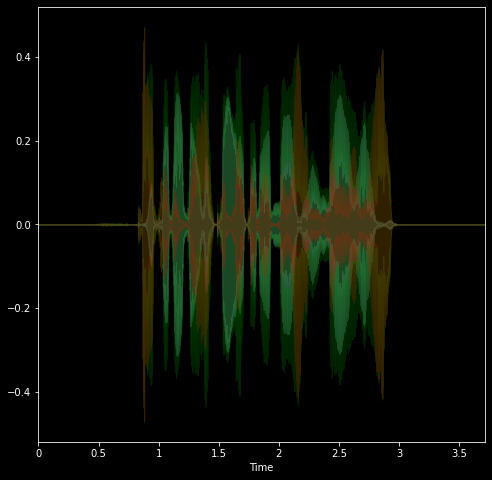

In [79]:
plt.figure(figsize=(8,8))
y_harm, y_perc = librosa.effects.hpss(audio_)
librosa.display.waveplot(y_harm, sr=sr_, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr_, color='r', alpha=0.25)
librosa.display.waveplot(audio_, sr=sr_, color='g', alpha=0.25)


In [80]:
from sklearn.cluster import KMeans

n_clusters = 5
audio_a = audio_.reshape(-1, 1)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(np.abs(audio_a))
print(kmeans.labels_.shape)

# find minimum audio value (quietest sample)
audio_min_idx = np.argmin(np.abs(audio_))
audio_min = audio_[audio_min_idx]

# find the cluster that sample is assigned to
silence_cluster = kmeans.labels_[audio_min_idx]


# Convert clusters to boolean
no_sig_tmp = np.array(kmeans.labels_== silence_cluster)
print(kmeans.labels_)

## Do not use the no_sig mask directly to the audio, it's only used to mark samples that should not be used
## However we still need additional processing on the no_sig to remove spurious no_sig markers as thay can happen
# if the signal has no power

## TODO: What does the power waveform look like? 

print(audio_a.shape)
print(fn)
print(sr_)



(81920,)
[0 0 0 ... 0 0 0]
(81920, 1)
./data/korean-single-speaker/kss/4/4_3332.wav
22050


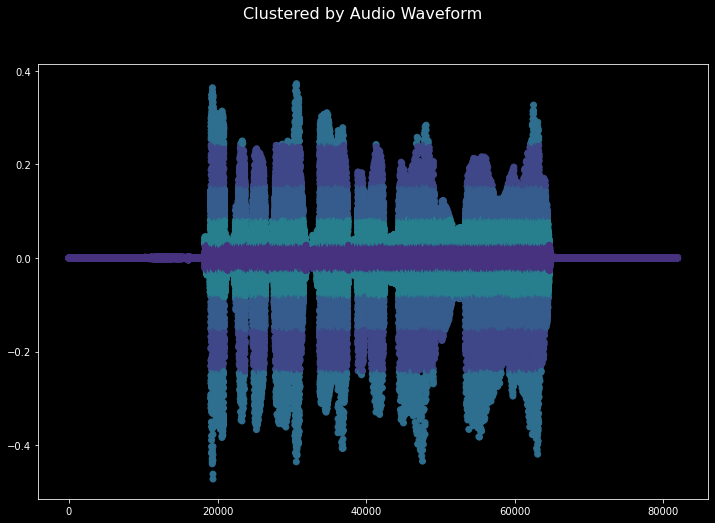

In [81]:
import matplotlib.cm as cm
from matplotlib import colors

cmap = cm.get_cmap('viridis', 15)
n_samps = kmeans.labels_.shape[0] # Not the best way, but should be ok
x_ = np.arange(n_samps)
c_ = kmeans.labels_
fig, ax1  = plt.subplots(figsize=(12,8))
fig.suptitle('Clustered by Audio Waveform', fontsize=16)
# librosa.display.waveplot(audio_, sr=sr_, alpha=0.25, x_axis='time', ax=ax1, color=colors[2])
# [ax1.axvline(x=x) for i,x in enumerate(kmeans.labels_)]
# ax1.scatter(x_, c_, c=cmap[c_]
ax1.scatter(x_, audio_a, c=cmap.colors[c_+2])
plt.show()

#### Convolve over hop_length

In [82]:
kernel = np.ones(hop_length)
# we divide by hop_length to keep relative values approximately the same
audio_pos = np.abs(audio_)
print(audio_pos.shape)
audio_sm = np.convolve(audio_pos, kernel, 'same')/hop_length
print(audio_sm.shape)

# TODO: We should be able to reduce the dimensionality.  Probably by hop_length/2 (so 2 bins for every hop_length)


(81920,)
(81920,)


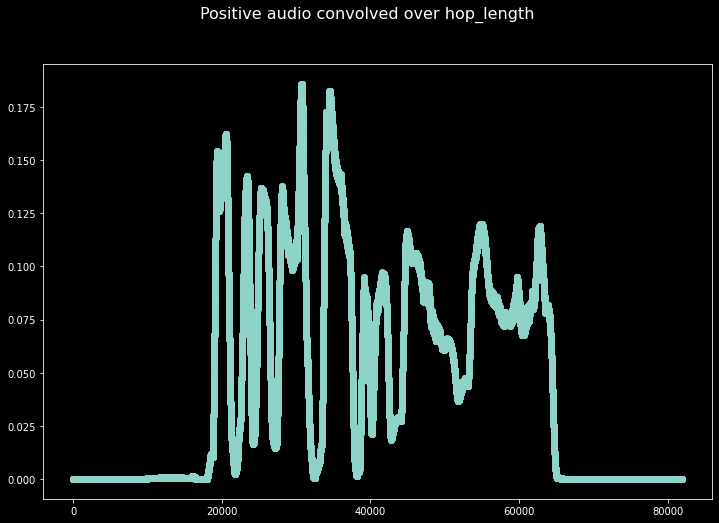

In [83]:
fig, ax1  = plt.subplots(figsize=(12,8))
fig.suptitle('Positive audio convolved over hop_length', fontsize=16)
ax1.scatter(x_, audio_sm)
plt.show()

(81920,)
512
160
0
(0,)
(81920,)
512
(160,)


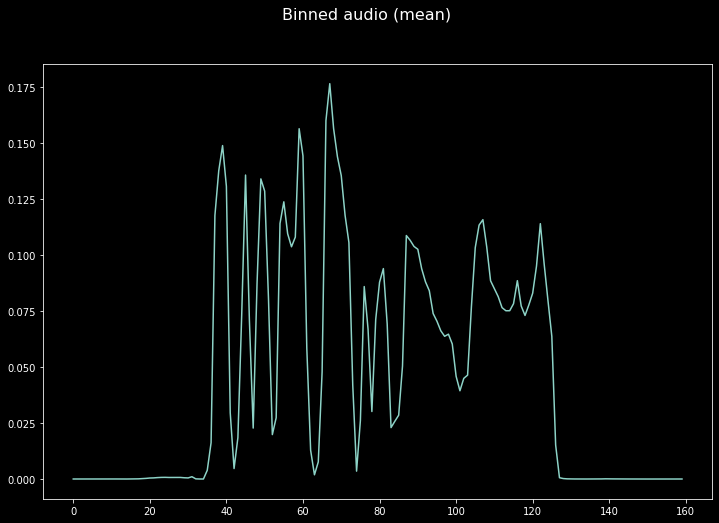

In [84]:
import math

audio_sm_len = audio_sm.shape[0]
n_bins = math.ceil(audio_sm_len/hop_length)
n_chunks = audio_sm_len/hop_length
pad_size = int((n_bins - n_chunks) * hop_length)
pad = np.zeros(pad_size)
audio_sm_pad = np.concatenate([audio_sm, pad])
samps_per_bin = audio_sm_pad.shape[0]//n_bins
audio_sm_reshape = audio_sm_pad.reshape((n_bins, samps_per_bin))
audio_sm_bin = np.mean(audio_sm_reshape, axis=1)


print(audio_sm.shape)
print(hop_length)
print(n_bins)
print(pad_size)
print(pad.shape)
print(audio_sm_pad.shape)
print(samps_per_bin)
print(audio_sm_bin.shape)

fig, ax1  = plt.subplots(figsize=(12,8))
fig.suptitle('Binned audio (mean)', fontsize=16)
ax1.plot(audio_sm_bin)
plt.show()



(81920,)


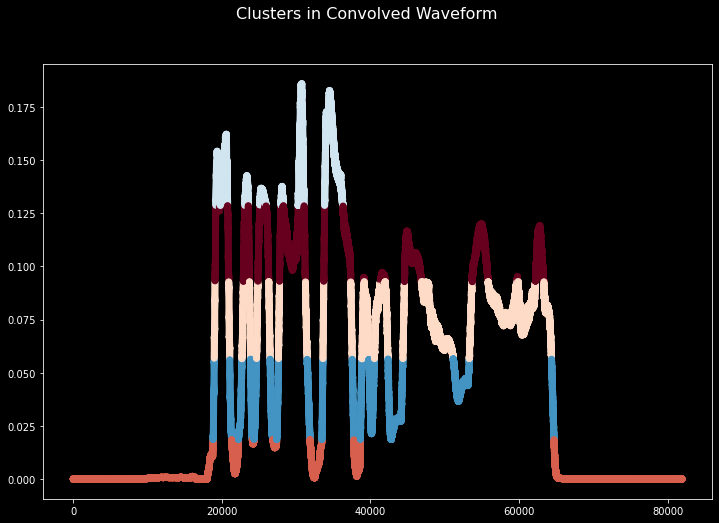

In [86]:
n_clusters = 5
audio_sm_a = audio_sm.reshape(-1, 1)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(audio_sm_a)
print(kmeans.labels_.shape)

cmap = cm.get_cmap('RdBu', 6)
colors = cmap(np.arange(0,cmap.N))
n_samps = kmeans.labels_.shape[0] # Not the best way, but should be ok
x_ = np.arange(n_samps)
c_ = kmeans.labels_
fig, ax1  = plt.subplots(figsize=(12,8))
fig.suptitle('Clusters in Convolved Waveform', fontsize=16)
# librosa.display.waveplot(audio_, sr=sr_, alpha=0.25, x_axis='time', ax=ax1, color=colors[2])
# [ax1.axvline(x=x) for i,x in enumerate(kmeans.labels_)]
# ax1.scatter(x_, c_, c=cmap[c_]
ax1.scatter(x_, audio_sm_a, c=colors[c_])
plt.show()

In [87]:
IPython.display.Audio(audio_sm, rate=sr_)

## Cluster MFCCs


In [88]:
# from sklearn.cluster import AffinityPropagation

mfccs_t = mfccs.T
print(mfccs_t[27])
mfcc_cl = KMeans(n_clusters=n_mfcc, random_state=0).fit(mfccs_t)
labels = mfcc_cl.labels_

[-4.9313223e+02  5.2850838e+01 -7.7510400e+00  2.1631573e+01
  2.3148479e+01 -1.2967987e+01 -1.1201628e+01  8.1096401e+00
  1.8026285e+00 -1.3928100e+01 -1.0187210e+01 -5.7843113e-01
  2.1849686e-01  2.8201904e+00  4.9188825e-01 -6.7221861e+00
 -6.5356779e+00 -7.6590276e+00 -8.2223310e+00 -3.7963476e+00]


(161, 20)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  5  5  5
  5  5  5  5  5  5  5  5  0  0  0 17 17 12 12 12 12 12 17  9  9  9  4  7
  7  7  7  7  7  8 10 10 10 10 10 18  8  8  2 17 17 12 12  8  2  2  4  4
  4  7  7  7  4  4  8  8 18 18 18  8 11 11  8 18 18  1  1  1 13 13 13  3
  3 14  2  2  2 11 11 11 14 14  1  1  1  1  1  1  1  1 15 15 15 15 15 14
  6  6  6  6 19 19 16 11  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

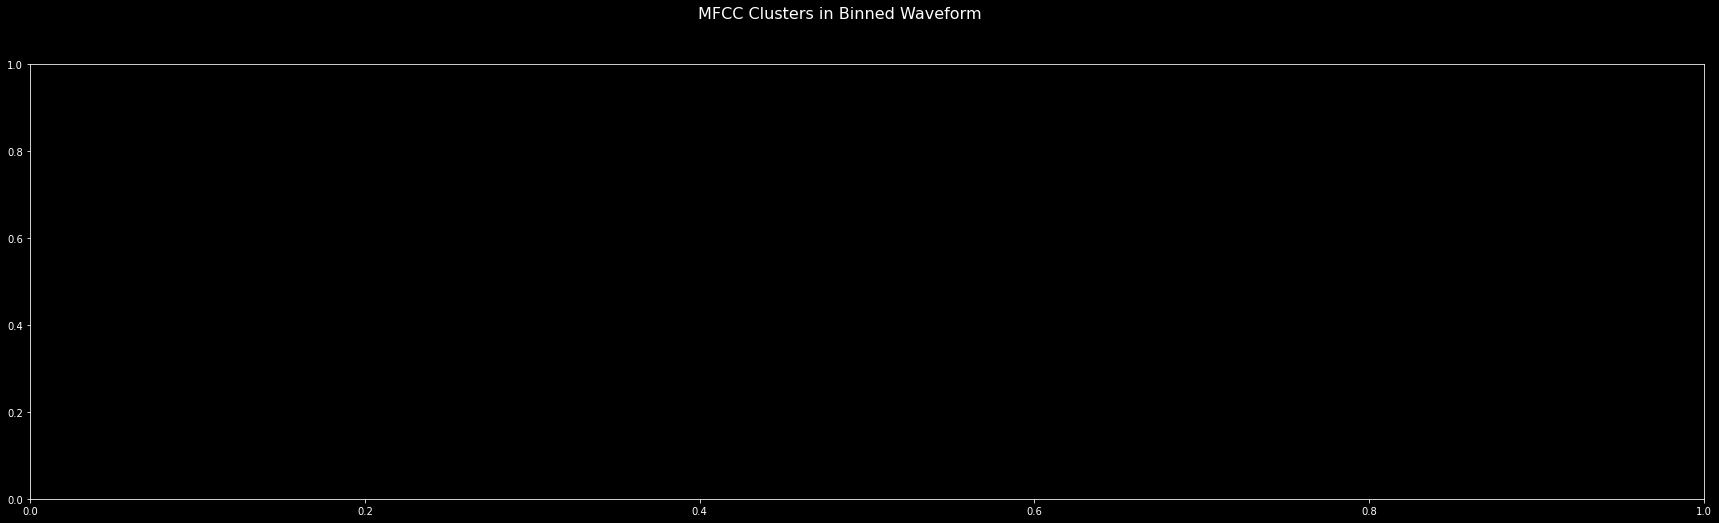

In [89]:
print(mfccs_t.shape)
print(labels)

cmap = cm.get_cmap('hsv', max(mfcc_cl.labels_)+1)
cl_label = np.arange(0, cmap.N)
colors = cmap(cl_label)
n_samps = mfcc_cl.labels_.shape[0] # Not the best way, but should be ok
x_ = np.arange(n_samps)
c_ = mfcc_cl.labels_
fig, ax1  = plt.subplots(figsize=(30,8))
fig.suptitle('MFCC Clusters in Binned Waveform', fontsize=16)
# librosa.display.waveplot(audio_, sr=sr_, alpha=0.25, x_axis='time', ax=ax1, color=colors[2])
# [ax1.axvline(x=x) for i,x in enumerate(kmeans.labels_)]
# ax1.scatter(x_, c_, c=cmap[c_]

# ax1.scatter(x_, audio_sm_bin, c=colors[c_])
ax1.bar(x_,np.ones(n_bins)*0.35, color=colors[c_], alpha=0.25)
ax1.plot(audio_sm_bin, alpha=0.5)
ax1.legend()
[ax1.axvline(x=x*(sr_/hop_length)) for x in onset_detects]
plt.show()


print(f'text: {tr_syl_}')
IPython.display.Audio(audio_, rate=sr_)